# Math105A homework

Please do the following (non-graded) homework taken from the Text in preparation for a (graded) quiz on Thursday 10/12. 

Round-off error: Section 1.2: 2c, 3d, 12

Bisection method: Section 2.1: 3a, 5b, 11c, 14

# Math105LA computer assignment

Please fill the remainder of this notebook with your code (remove `pass` after "# your code here"), execute all cells, save the notebook on your machine, and upload the notebook only (i.e. not any other files in this archive) to the [Math105LA Assign01 Dropbox](https://eee.uci.edu/toolbox/dropbox/) by the deadline indicated in the Dropbox. A primer on Dropbox is [here](https://eee.uci.edu/help/dropbox/instructors/_assets/dropbox_primer.pdf).



### Problem 1

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}.$$

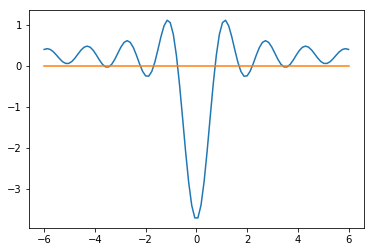

In [1]:
import numpy as np 
f = lambda x: 0.25 - np.sin(4*x)/x
g = lambda x: 0*x
x = np.linspace(-6,6,100)

from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(x, f(x))
plt.plot(x, g(x))

Write a python function `multi_bisection` to compute all 10 roots of $f(x)$. 

In [3]:
from bisection import bisection

def multi_bisection(func, grid, n_max): 
    '''
    input: 
        func = function whose roots we want to compute
        grid = numpy array containing a grid of points spanning the interval containing roots
        n_max = maximum number of iterations
    output: 
        returns a python list whose elements are the roots we want to compute
        '''
    
    ps = []
    lowers = grid[:-1]
    uppers = grid[1:]
    for lower, upper in zip(lowers,uppers): 
        if func(lower)*func(upper) < 0.0:
            ps += [bisection(func, lower, upper, n_max)]   
    return ps

roots = multi_bisection(func=f, grid=x, n_max=100)
print 'roots = ', roots
print
print 'max value of |f(roots)| = ', np.vectorize(f)(roots).max() if roots != None else None

roots =  [-3.6410164707276547, -3.3949964664510857, -2.2098644955973947, -1.6790953589566251, -0.73894715476012962, 0.73894715476012962, 1.6790953589566251, 2.2098644955973947, 3.3949964664510857, 3.6410164707276547]

max value of |f(roots)| =  3.88578058619e-16


### Outline of solution 

* loop through consecutive pairs of elements of the array `x`
* apply my function, `bisection`, to each such subinterval of [-6,6]
* use a `list` to accumulate the roots you find in each subinterval

### Code snippets you might find helpful:

In [3]:
a = [1,2,3,4]
lowers = a[:-1]
lowers

[1, 2, 3]

In [4]:
uppers = a[1:]
uppers 

[2, 3, 4]

In [5]:
list_of_lower_upper_tuples = zip(a[:-1],a[1:])
list_of_lower_upper_tuples

[(1, 2), (2, 3), (3, 4)]

In [6]:
for lower, upper in zip(lowers,uppers): 
    print lower, upper

1 2
2 3
3 4


In [7]:
b = [10, 11]
b += [12]
b

[10, 11, 12]